<Figure size 2000x2000 with 0 Axes>

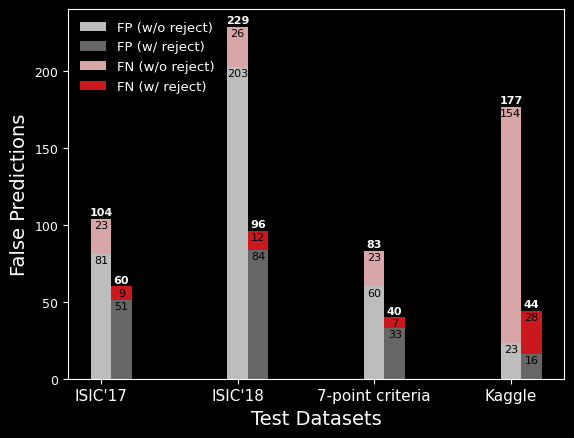

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline
# Enter raw data
# tool, size, C_ratio, C_factor, error (min, max, mean, std), endpoints error (min, max, mean, std)
# qfibdata= [['qfib(8bit)',    22.9,   96.881, 32.064, 0.0, 0.758, 0.058, 0.023, 0.0, 0.74,  0.038, 0.038],
#            ['qfib(16bit)',   44.24,  93.975, 16.597, 0.0, 0.019, 0.002, 0.001, 0.0, 0.017, 0.001, 0.001],
#            ['zfib/DIPY',     118.65, 83.839, 6.188,  0,   0,     0.0,   0.0,   0.0,   0,   0.0,   0.0  ],
#            ['TRAKO',         46.18,  93.71,  15.899, 0.0, 0.018, 0.01,  0.003, 0.0, 0.018, 0.01,  0.002],
#            ['TRAKO(Binary)', 34.63,  95.283, 21.199, 0.0, 0.018, 0.01,  0.003, 0.0, 0.018, 0.01,  0.002]]
plt.style.use(['dark_background'])
abcdij = {
    "Network": "EfficientNetB1",
    "combination": "a+b+c+d+e+h+i",
    "ISIC'17": {
        "FP": {
            "before_rej": 81,
            "after_rej": 51
        },
        "FN": {
            "before_rej": 23,
            "after_rej": 9
        }
    },
    "ISIC'18": {
        "FP": {
            "before_rej": 203,
            "after_rej": 84
        },
        "FN": {
            "before_rej": 26,
            "after_rej": 12
        }
    },
    "7-point criteria": {
        "FP": {
            "before_rej": 60,
            "after_rej": 33
        },
        "FN": {
            "before_rej": 23,
            "after_rej": 7
        }
    },
    "Kaggle": {
        "FP": {
            "before_rej": 23,
            "after_rej": 16
        },
        "FN": {
            "before_rej": 154,
            "after_rej": 28
        }
    }

}

# labels for bars
tick_label = ["ISIC'17", "ISIC'18", "7-point criteria", "Kaggle"]

plt.figure(figsize=(20,20))
# x-coordinates of left sides of bars  
graph_order = np.arange(len(tick_label))
  
# bar graphs
FNs_beforeRej = [abcdij["ISIC'17"]["FN"]["before_rej"],
abcdij["ISIC'18"]["FN"]["before_rej"], abcdij["7-point criteria"]["FN"]["before_rej"], abcdij["Kaggle"]["FN"]["before_rej"]]
FNs_afterRej = [abcdij["ISIC'17"]["FN"]["after_rej"],
abcdij["ISIC'18"]["FN"]["after_rej"], abcdij["7-point criteria"]["FN"]["after_rej"], abcdij["Kaggle"]["FN"]["after_rej"]]
FPs_beforeRej = [abcdij["ISIC'17"]["FP"]["before_rej"],
abcdij["ISIC'18"]["FP"]["before_rej"], abcdij["7-point criteria"]["FP"]["before_rej"], abcdij["Kaggle"]["FP"]["before_rej"]]
FPs_afterRej = [abcdij["ISIC'17"]["FP"]["after_rej"],
abcdij["ISIC'18"]["FP"]["after_rej"], abcdij["7-point criteria"]["FP"]["after_rej"], abcdij["Kaggle"]["FP"]["after_rej"]]


  
# plotting a bar chart
w = 0.15

fig, ax=plt.subplots()
ax.tick_params(axis='x', labelsize=11)
ax.bar(graph_order, FPs_beforeRej, tick_label = tick_label, width = w, color = ['#bdbdbd'])
ax.bar(graph_order + w, FPs_afterRej, width = w, color = ['#666666'])
ax.bar(graph_order, FNs_beforeRej, bottom = FPs_beforeRej, width = w, color = ['#d8a6a6'])
ax.bar(graph_order + w, FNs_afterRej, bottom = FPs_afterRej, width = w, color = ['#cb181d'])
# ax.bar(graph_order + w * 2, block3, width = w, color = ['#666666'])
# ax.bar(graph_order + w * 3, block4, width = w, color = ['#dc133b']) # previous FN color
# ax.bar(graph_order + w * 4, block5, width = w, color = ['#cd5c5c']) # previous FP

# Adding total labels
for i in range(len(graph_order)):
    # Subtotal labels for "before rejection" (FP + FN)
    subtotal_before = FPs_beforeRej[i] + FNs_beforeRej[i]
    ax.text(graph_order[i], subtotal_before + 1, f'{subtotal_before}', color='white', weight='bold', horizontalalignment='left',
      verticalalignment='center', ha='center', va='bottom', fontsize=8)
    
    # Subtotal labels for "after rejection" (FP + FN)
    subtotal_after = FPs_afterRej[i] + FNs_afterRej[i]
    ax.text(graph_order[i] + w, subtotal_after + 1, f'{subtotal_after}', color='white', weight='bold', horizontalalignment='left',
      verticalalignment='center', ha='center', va='bottom', fontsize=8)

# Let's put the annotations inside the bars themselves by using a
# negative offset.
y_offset = -3.4
# For each patch (basically each rectangle within the bar), add a label.
for idx, bar in enumerate(ax.patches):
    ax.text(
        # Put the text in the middle of each bar. get_x returns the start
        # so we add half the width to get to the middle.
        bar.get_x() + bar.get_width() / 2,
        # Vertically, add the height of the bar to the start of the bar,
        # along with the offset.
        bar.get_height() + bar.get_y() + y_offset,
        # This is actual value we'll show.
        round(bar.get_height()),
        horizontalalignment='center',
        verticalalignment='center_baseline',
        # Center the labels and style them a bit.
        #   ha='center',
        color='black',
        #   weight='bold',
        size=8
    )


# naming the x-axis
plt.xlabel('Test Datasets', fontsize=14)
# naming the y-axis 
plt.ylabel('False Predictions', fontsize=14)

leg = plt.legend(('FP (w/o reject)', 'FP (w/ reject)','FN (w/o reject)', 'FN (w/ reject)'), loc='upper left',
fontsize=9.5, frameon=False)

frm = leg.get_frame()
frm.set_edgecolor('#ffffff')
frm.set_facecolor('#ffffff')


font = {
    'family': 'sans-serif',
    'size': 9
}
plt.rc('font', **font)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


# function to show the plot 
plt.show() 
fig.savefig('reduced_falses_darkened.pdf', dpi = 300, bbox_inches='tight')


<Figure size 2000x2000 with 0 Axes>

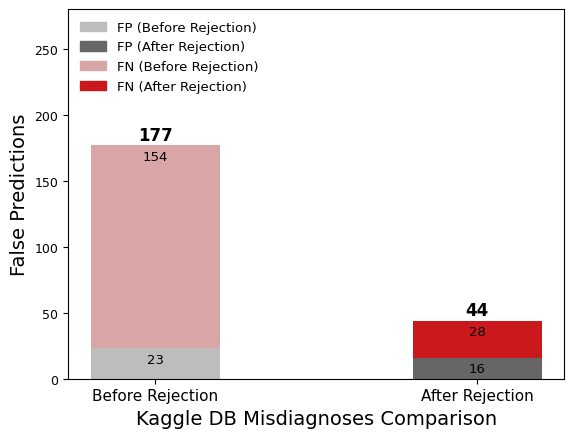

In [5]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline
# Enter raw data
# tool, size, C_ratio, C_factor, error (min, max, mean, std), endpoints error (min, max, mean, std)
# qfibdata= [['qfib(8bit)',    22.9,   96.881, 32.064, 0.0, 0.758, 0.058, 0.023, 0.0, 0.74,  0.038, 0.038],
#            ['qfib(16bit)',   44.24,  93.975, 16.597, 0.0, 0.019, 0.002, 0.001, 0.0, 0.017, 0.001, 0.001],
#            ['zfib/DIPY',     118.65, 83.839, 6.188,  0,   0,     0.0,   0.0,   0.0,   0,   0.0,   0.0  ],
#            ['TRAKO',         46.18,  93.71,  15.899, 0.0, 0.018, 0.01,  0.003, 0.0, 0.018, 0.01,  0.002],
#            ['TRAKO(Binary)', 34.63,  95.283, 21.199, 0.0, 0.018, 0.01,  0.003, 0.0, 0.018, 0.01,  0.002]]
# plt.style.use(['dark_background'])
abcdij = {
    "Network": "EfficientNetB1",
    "combination": "a+b+c+d+e+h+i",
    
    "Kaggle": {
        "FP": {
            "before_rej": 23,
            "after_rej": 16
        },
        "FN": {
            "before_rej": 154,
            "after_rej": 28
        }
    }

}

# labels for bars
# tick_label = ["Before Rejection"]
tick_label = ["Before Rejection", "After Rejection"]

plt.figure(figsize=(20,20))
# x-coordinates of left sides of bars  
# graph_order = np.arange(len(tick_label))
graph_order = [0, 1]


  
# bar graphs
FNs_beforeRej = [abcdij["Kaggle"]["FN"]["before_rej"]]
FNs_afterRej = [abcdij["Kaggle"]["FN"]["after_rej"]]
FPs_beforeRej = [abcdij["Kaggle"]["FP"]["before_rej"]]
FPs_afterRej = [abcdij["Kaggle"]["FP"]["after_rej"]]


  
# plotting a bar chart
w = 0.4

fig, ax=plt.subplots()

ax.tick_params(axis='x', labelsize=11)
ax.set_xticks(graph_order)
ax.set_xticklabels(tick_label)
ax.bar(graph_order[0], FPs_beforeRej, width = w, color = ['#bdbdbd'])
ax.bar(graph_order[0], FNs_beforeRej, bottom = FPs_beforeRej, width = w, color = ['#d8a6a6'])

# ax.bar(graph_order + w * 2, block3, width = w, color = ['#666666'])
# ax.bar(graph_order + w * 3, block4, width = w, color = ['#dc133b']) # previous FN color
# ax.bar(graph_order + w * 4, block5, width = w, color = ['#cd5c5c']) # previous FP

# Adding total labels

# Subtotal labels for "before rejection" (FP + FN)
subtotal_before = FPs_beforeRej[0] + FNs_beforeRej[0]
ax.text(graph_order[0], subtotal_before + 1, f'{subtotal_before}', color='black', weight='bold', horizontalalignment='left',
    verticalalignment='center', ha='center', va='bottom', fontsize=12)


subtotal_after = FPs_afterRej[0] + FNs_afterRej[0]
ax.text(graph_order[1], subtotal_after + 1, f'{subtotal_after}', color='black', weight='bold', horizontalalignment='left',
    verticalalignment='center', ha='center', va='bottom', fontsize=12)

    
offset = 0.3/3.5
# ax.bar(graph_order + w, FPs_afterRej, width = w, color = ['#666666'])
# ax.bar(graph_order + w, FNs_afterRej, bottom = FPs_afterRej, width = w, color = ['#cb181d'])    
ax.bar(graph_order[1], FPs_afterRej, width = w, color = ['#666666'])
ax.bar(graph_order[1], FNs_afterRej, bottom = FPs_afterRej, width = w, color = ['#cb181d'])    


# for i in range(len(graph_order)):
#     # Subtotal labels for "after rejection" (FP + FN)
#     subtotal_after = FPs_afterRej[0] + FNs_afterRej[0]
#     ax.text(graph_order[i] + w, subtotal_after + 1, f'{subtotal_after}', color='white', weight='bold', horizontalalignment='left',
#         verticalalignment='center', ha='center', va='bottom', fontsize=8)

# Let's put the annotations inside the bars themselves by using a
# negative offset.
y_offset = -7.4
# For each patch (basically each rectangle within the bar), add a label.
for idx, bar in enumerate(ax.patches):
    ax.text(
        # Put the text in the middle of each bar. get_x returns the start
        # so we add half the width to get to the middle.
        bar.get_x() + bar.get_width() / 2,
        # Vertically, add the height of the bar to the start of the bar,
        # along with the offset.
        bar.get_height() + bar.get_y() + y_offset,
        # This is actual value we'll show.
        round(bar.get_height()),
        horizontalalignment='center',
        verticalalignment='center_baseline',
        # Center the labels and style them a bit.
        #   ha='center',
        color='black',
        #   weight='bold',
        size=9.5
    )

ax.set_ylim(0, 280)

# naming the x-axis
plt.xlabel('Kaggle DB Misdiagnoses Comparison', fontsize=14)
# naming the y-axis 
plt.ylabel('False Predictions', fontsize=14)

from matplotlib.patches import Patch
legend_patches = [
    Patch(color='#bdbdbd', label='FP (Before Rejection)'),
    Patch(color='#666666', label='FP (After Rejection)'),
    Patch(color='#d8a6a6', label='FN (Before Rejection)'),
    Patch(color='#cb181d', label='FN (After Rejection)')
]

# Add the legend to your plot
leg = plt.legend(
    handles=legend_patches,
    loc='upper left',
    fontsize=9.5,
    frameon=False
)

# leg = plt.legend(('FP (w/o reject)', 'FP (w/ reject)','FN (w/o reject)', 'FN (w/ reject)'), loc='upper left',
# fontsize=9.5, frameon=False)

frm = leg.get_frame()
frm.set_edgecolor('#ffffff')
frm.set_facecolor('#ffffff')


font = {
    'family': 'sans-serif',
    'size': 9
}
plt.rc('font', **font)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


# function to show the plot 
plt.show() 
fig.savefig('reduced_falses_presentationonly.pdf', dpi = 300, bbox_inches='tight')
